In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from scipy.special import gamma, factorial, gammainc

# Integración
---
Vamos a utilizar el método Runge-Kutta de cuarto orden para integrar las funciones.

**Parámetros de integración:** Estos son los parámetros de entrada para el método Runge-Kutta:
  * `func`: Función que queremos integrar
  * `a, b, N`: Intervalo de integración, dado por $(a, b)$, y el número de intervalos en los que queremos segmentar el eje x, dado por $N$.
  * `tol`: Tolerancia. Este parámetro se define para facilitar la búsqueda de discontinuidades dentro del intervalo $(a, b)$.
  * `param_dict`: Estructura de diccionario que trae todos los parámetros de entrada de la función `func`. De esta manera, funciones que necesitan distinto número de parámetros de entrada pueden integrarse con la misma función `RK4()` presentada a continuación:

In [2]:
def RK4(func, a, b, N, tol, param_dict):
    deltat = float(b-a)/N
    yi = 0
    fi_list = [0]
    
    for i in range(N):
        
        ti = a + i*deltat
        k1 = deltat * func(ti, yi, param_dict)
        k2 = deltat * func(ti + 0.5*deltat, yi + 0.5*k1, param_dict)
        k3 = deltat * func(ti + 0.5*deltat, yi + 0.5*k2, param_dict)
        k4 = deltat * func(ti + deltat, yi + k3, param_dict)
        yi += (k1 + 2*k2 + 2*k3 + k4)/6.
        
        fi = func(ti, 0, param_dict)
        diff = fi-fi_list[-1]
        fi_list.append(fi)
        
        if(abs(diff) > tol):
            print("Se rompió el ciclo en el punto %.4f del eje x, ciclo %i"%(ti, i))
            break
            
    print("Diferencia f(x+dx) - f(x): ", diff)
    return yi

## Evaluación
---
Revisamos si nuestra función `RK4()` encuentra correctamente los valores para tres funciones:
 * Primero, para una distribución normal estándar integrada entre $(0, +\infty)$
 * Segundo, para la función $f(x) = \frac{1}{x}$ para $x\in(-5, 5)$
 * Tercero, para la función $f(x) = \frac{1}{1-x^2}$ para $x\in(0, 2)$
 
De esta manera, podemos ver si funciona para funciones continuas y discontinuas.

In [3]:
# TEST - funcion continua
def gausss(xx, y, t):
    return np.exp(-0.5*xx*xx)/np.sqrt(2*np.pi)

rer = RK4(gausss, 0, 1000, 10000, 0.5, 5)
print("Resultado: ", rer)

Diferencia f(x+dx) - f(x):  0.0
Resultado:  0.5000000000000001


In [4]:
# TEST 2 - funciones con discontinuidades
def func_test(xx, a, b):
    return 1./xx

def func_test2(xx, a, b):
    return 1./(1-xx**2)

reer  = RK4(func_test, -5, 5, 100000, 5, 5) # Funcion decreciente entre (-5, 0)
print("Resultado: ", reer)
print("-"*70)
reeer = RK4(func_test2, 0, 2, 100000, 5, 5) # Funcion creciente entre (0, 1)
print("Resultado: ", reeer)

Se rompió el ciclo en el punto -0.0044 del eje x, ciclo 49956
Diferencia f(x+dx) - f(x):  -5.050505050538504
Resultado:  -7.058578169325938
----------------------------------------------------------------------
Se rompió el ciclo en el punto 0.9986 del eje x, ciclo 49930
Diferencia f(x+dx) - f(x):  5.030178582967551
Resultado:  3.639064361152683


# Aplicación
---
Una vez definida la regla de integración, podemos aplicarlo al problema de interés

# Parámetros de la integral
---
Terminanos definiendo los parámetros $p, c, C, \eta, \beta, M, \lambda, \sigma$ estrictamente positivos.

In [5]:
# Variables globales
p    = 1 #1. #0.5
c    = 3. #2
C    = 5 #0.99
eta  = 0.5 # Coeficiente de aversion al riesgo - el que mas varia
beta = 10
M    = 10 #M_param(10, eta)
lamb = 0.2
sig  = 0.3
alph = 0.5 #alpha(0.5)
rh   = 0.3 #rho(0.2) # tambien varia harto
mu   = 0.09 #test

# Creamos un diccionario que contenga los parametros numericos: numerical_params
numerical_params = {"p": p, "c": c, "C": C, "eta": eta, "beta": beta, "M": M, "lamb": lamb, "sig": sig, 
                    "alph": alph, "rho": rh, "mu": mu}

# Distribuciones de probabilidad
---
Ahora, definimos los parámetros para las distintas distribuciones de probabilidad que nos interesan.

In [6]:
# Nombre de la distribucion
dist = "Exponencial"

# Parametros de la distribucion exponencial
exp_lam = 2

# Parametros de la distribucion Weibull
wei_lam = 1
wei_k   = 5

# Parametros de la distribucion Pareto
par_xm  = 2
par_al  = 2

# Parametros de la distribucion Gamma
gam_al  = 2
gam_bet = 2

# Creamos un diccionario que contenga los parametros de la distribucion: dist_params
dist_params = {"ff": dist, "exp_lam": exp_lam, "wei_lam": wei_lam, "wei_k": wei_k, "par_xm": par_xm, 
               "par_al": par_al, "gam_al": gam_al, "gam_bet": gam_bet}

Una vez definidos los parámetros de nuestras funciones, guardamos estos en una estructura de diccionario. Esto se hace ya que las funciones que queremos integrar tienen un número distinto de parámetros de entrada. Por lo tanto, incluir todos los parámetros en una única estructura es más conveniente a la hora de aplicar nuestro método de integración `RK4()`.

In [7]:
# Diccionario que contiene todos los parametros

all_params = {"ff": dist, "exp_lam": exp_lam, "wei_lam": wei_lam, "wei_k": wei_k, "par_xm": par_xm, 
               "par_al": par_al, "gam_al": gam_al, "gam_bet": gam_bet, "p": p, "c": c, "C": C, 
               "eta": eta, "beta": beta, "M": M, "lamb": lamb, "sig": sig, "alph": alph, "rho": rh, "mu": mu}

## Funciones de densidad
---

Ahora definimos las funciones de densidad para las funciones que nos interesan. En orden, son las densidad exponencial, Weibull, Pareto y gamma.

**NOTA:** Hay que tener cuidado con el soporte que tiene cada distribución. Si se incluyen valores de $x$ para los cuales $f(x)$ no está bien definida, los resultados estarán equivocados.

In [8]:
def dens_func(xx, y, param_dict):
    
    # Distribucion exponencial
    if(param_dict["ff"] == "Exponencial"):
        return param_dict["exp_lam"] * np.exp(-param_dict["exp_lam"]*xx)
    
    # Distribucion Weibull
    elif(param_dict["ff"] == "Weibull"):
        #xx = xx[xx >= 0]
        klam = np.true_divide(param_dict["wei_k"], param_dict["wei_lam"])
        x    = np.true_divide(xx, param_dict["wei_lam"])**(param_dict["wei_k"] -1.0)
        temp = -1*np.true_divide(xx, param_dict["wei_lam"])**(param_dict["wei_k"])
        expo = np.exp(temp)
        return klam*x*expo
    
    # Distribucion Pareto
    elif(param_dict["ff"] == "Pareto"):
        #assert min(xx) > param_dict["par_xm"], "Los valores de x deben ser mayores que x_m"
        xx = xx[xx > param_dict["par_al"]]
        x    = param_dict["par_al"] * (param_dict["par_xm"]**(param_dict["par_al"]))
        deno = xx**(param_dict["par_al"] +1)
        return np.true_divide(x, deno)
    
    # Distribucion Gamma
    elif(param_dict["ff"] == "Gamma"):
        #xx = xx[xx >= 0]
        norm = np.true_divide(1.0, (gamma(param_dict["gam_al"])))
        bb = param_dict["gam_bet"]**(param_dict["gam_al"])
        x1 = xx**(param_dict["gam_al"] - 1)
        x2 = np.exp(-1*param_dict["gam_bet"] * xx)
        return norm*bb*x1*x2

## Funciones de distribución
---

Ahora definimos las funciones de distribución: exponencial, Weibull, Pareto y gamma.

**NOTA:** La misma que se incluyó para las funciones de densidad, hay que tener cuidado con el soporte de $F(x)$.

In [9]:
def dist_func(xx, y, param_dict):
    
    # Distribucion exponencial
    if (param_dict["ff"] == "Exponencial"):
        return 1-np.exp(-param_dict["exp_lam"]*xx)
    
    # Distribucion Weibull
    elif(param_dict["ff"] == "Weibull"):
        #xx = xx[xx >= 0]
        xlam = np.power(np.true_divide(xx, param_dict["wei_lam"]), (param_dict["wei_k"]))
        return 1-np.exp(-1*xlam)
    
    # Distribucion Pareto
    elif(param_dict["ff"] == "Pareto"):
        xx = xx[xx > param_dict["par_al"]]
        x  = (np.true_divide(param_dict["par_xm"], xx))**(param_dict["par_al"])
        return 1-x
    
    # Distribucion Gamma
    elif(param_dict["ff"] == "Gamma"):
        #xx = xx[xx > 0]
        norm = np.true_divide(1.0, (gamma(param_dict["gam_al"])))
        bet  = param_dict["gam_bet"]*xx
        return norm * gammainc(param_dict["gam_al"], bet)

## Visualización
---
Visualizamos los resultados para distintas distribuciones de probabilidad

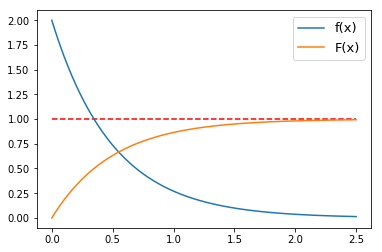

In [10]:
# Densidad de probabilidad
x = np.linspace(0, 2.5, 1000)
y = dens_func(x, 0, dist_params)
plt.plot(x[x>=0], y, label="f(x)")

# Distribucion de probabilidad
y = dist_func(x, 0, dist_params)
plt.plot(x[x>=0], y, label="F(x)")

plt.hlines(y=1.0, xmin=0, xmax=2.5, linestyles="--", color="r")
plt.legend(loc="best", fontsize=13)
plt.show()

# Condición de intersección
---

Las curvas $q(\pi, \kappa)$ y $h(\pi, \kappa)$ deberían intersectarse únicamente cuando:

$$q\left(\pi = \frac{1}{\eta\beta\rho\sigma}\left\{ \int_0^c y \ f(y) dy + c[1-F(c)]-p  \right\}, 0\right) > 0$$

En esta parte, verificamos si la condición se cumple o no. Primero, definimos la función $y \ f(y)$ que va dentro de la integral:
$$\int_0^c y \ f(y) dy$$
A la función $y \ f(y)$ la llamamos `cond_func()`.

In [11]:
def cond_func(xx, y, param_dict):
    return xx*dens_func(xx, y, param_dict)

Una vez definida esta integral, podemos calcular el valor de $\pi$:
$$\pi = \frac{1}{\eta\beta\rho\sigma}\left\{ \int_0^c y \ f(y) dy + c[1-F(c)]-p  \right\}$$

In [12]:
# Se calcula el valor numerico de pi segun lo especifica la condicion
x = np.linspace(0.0001, c)

# Calculamos el coeficiente que multiplica a los terminos dentro del corchete
con_coef = 1/(numerical_params["rho"]*numerical_params["eta"]*numerical_params["beta"]*numerical_params["sig"])

# Aplicamos la funcion RK4 para encontrar el valor de pi
pi_cond = con_coef*(RK4(cond_func, 0.001, c, 100, 0.3, dist_params) + c*(1-dist_func(c, y, dist_params)) - p)

Diferencia f(x+dx) - f(x):  -0.0007987957992429753


In [13]:
# Revisamos el valor de pi_cond

pi_cond

-1.113867514432353

Para la distribución exponencial, obtuvimos un valor de `pi_cond` ($\pi_c$) igual a -1.11386.

Una vez calculado el valor $\pi_c$, podemos insertarlo en la función $q(\pi_c, 0)$. De esta manera, sabremos si las curvas de nivel se intersectan si 
$$q(\pi_c, 0) > 0$$

**Ahora:** La función $q(\pi, \kappa)$ es:
$$q(\pi, \kappa) = \mu-\eta\sigma\left[ \sigma\pi-\rho\beta\kappa \right] + \int_{-\infty}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz $$

Por lo tanto, debemos comenzar definiendo la función `q_integ` de la forma: $$ \frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz $$
La cual va dentro del término integral de la función $q(\pi, \kappa)$

In [14]:
# Definimos el termino de la integral de la funcion q

def q_integ(zz, y, param_dict):
    num = param_dict["C"]*np.exp(-1*param_dict["M"]*zz)*(np.exp(zz)-1)
    den = np.float_power(1+(pi_cond * (np.exp(zz)-1) ), param_dict["eta"]) * np.float_power(abs(zz), 1+param_dict["alph"])
    return num/den

### Visualización de q_integ

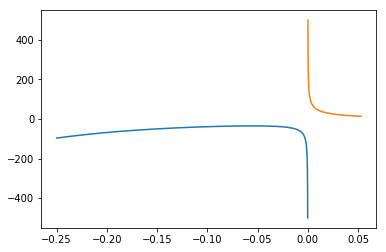

In [15]:
# AHORA: Visualizamos la funcion q_integ entre los limites definidios abajo:

# Limites de la integral para x<0
lim_inf = -5
lim_sup = -0.0001
# Limites de la integral para x>0
Lim_inf = 0.0001
Lim_sup = 0.053 #0.2878 # Weibull

x = np.linspace(0.05*lim_inf, lim_sup, 100000)
plt.plot(x, q_integ(x, 0, numerical_params))
#plt.show()

x = np.linspace(Lim_inf, Lim_sup, 1000000)
plt.plot(x, q_integ(x, 0, numerical_params))

plt.show()

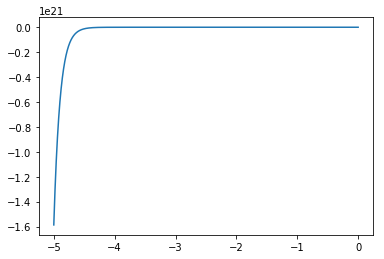

Diferencia f(x+dx) - f(x):  -54.609571201371466


In [16]:
# Nuevamente graficamos la funcion para mas valores de x

# Limites de la integral para x<0
lim_inf = -5
lim_sup = -0.0001
# Limites de la integral para x>0
Lim_inf = 0.0001
Lim_sup = 0.053 # 0.2878

x = np.linspace(lim_inf, lim_sup, 100000)
plt.plot(x, q_integ(x, 0, numerical_params))
plt.show()

RK1  = RK4(q_integ, lim_inf , lim_sup, 100000, 1e22, all_params)

Es claro que hay una discontinuidad en el cero, y más allá del 0.053, las soluciones son complejas. Sin embargo, como la función es continua a ambos lados del cero, podemos separa la integral para los términos menores a cero y los términos mayores a cero.

## Evaluación de la condición
---
Ahora, definimos la función `q_func` como la función:
$$q(\pi, \kappa) = \mu-\eta\sigma\left[ \sigma\pi-\rho\beta\kappa \right] + \int_{-\infty}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz $$

Y evaluamos:

In [17]:
# Limites de la integral para x<0
lim_inf = -5
lim_sup = -0.0001
# Limites de la integral para x>0
Lim_inf = 0.0001
Lim_sup = 0.053 # 0.2878 

# Ahora definimos la funcion q

def q_func(pp, kk, param_dict):
    fix  = param_dict["mu"]-param_dict["eta"]*param_dict["sig"]*(param_dict["sig"]*pp - param_dict["rho"]*param_dict["beta"]*kk)
    RK1  = RK4(q_integ, lim_inf , lim_sup, 100000, 1e22, param_dict)
    print("RK1: %.4f"%(RK1))
    print("-"*60)
    RK2  = RK4(q_integ, Lim_inf,  Lim_sup, 100000, 500, param_dict)
    print("RK2: %.4f"%(RK2))
    #RK1  = RK4(q_integ, -0.07 , -0.001, 100, param_dict)
    #RK2  = RK4(q_integ, 0.001,  0.5,   100, param_dict) 
    return fix + RK1 + RK2

In [18]:
# Calculamos el valor numerico de la funcion q segun la condicion

cond_test = q_func(pi_cond, 0, numerical_params)

Diferencia f(x+dx) - f(x):  -54.609571201371466
RK1: -163607815867320827904.0000
------------------------------------------------------------
Diferencia f(x+dx) - f(x):  -0.00013116485293096503
RK2: 1.8855


In [19]:
# Revisamos el valor numerico de la condicion a ver si da positivo o negativo

cond_test

-1.6360781586732083e+20

# Resultado: condición
---
La condición $q(\pi_c, 0) = -1.636078 \cdot 10^{20}$. Es decir, nos da muy negativa. Por lo tanto, para los parámetros escogidos, las curvas de nivel no deberían intersectarse.

# Curvas de nivel
---
Mientras se cumpla la condición:

$$q\left(\pi = \frac{1}{\eta\beta\rho\sigma}\left\{ \int_0^c y \ f(y) dy + c[1-F(c)]-p  \right\}, 0\right) > 0$$

Las funciones $q(\pi, \kappa)$ y $h(\pi, \kappa)$ se interceptarán. La función $q(\pi, \kappa)$ se hará cero cuando:

$$\kappa = \frac{1}{\eta\beta\rho\sigma}\left\{ \eta\pi\sigma^2-\mu-\int_{-\infty}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz \right\} \ \in [0, 1/c)$$

Mientras tanto, $h(\pi, \kappa)$ se hará cero cuando:

$$\pi = \frac{\lambda}{\eta\beta\rho\sigma}\left\{ \int_0^c\frac{y\ f(y)}{\left[ 1-\kappa y \right]^{\eta}}dy +\frac{c[1-F(y)]}{\left[ 1-\kappa c \right]^{\eta}}\right\} + \frac{\beta\kappa}{\rho\sigma}-\frac{p}{\eta\beta\rho\sigma} \ \in (-\infty, +\infty)$$

 * Por lo tanto, para la primera ecuación, evaluaremos valores de $\pi$ y obtendremos el $\kappa$ dado por esta ecuación. Iterando sobre múltiples $\pi$, tendremos una curva de nivel donde la ecuación $q(\pi, \kappa)$ sea cero.
 
 * Para la segunda ecuación tendremos lo converso. Iterando valores de $\kappa$ obtendremos un conjunto de valores que harán que la función $h(\pi, \kappa)$ sea cero
 
Graficando los resultados anteriores, veremos si las curvas llegan a intersectarse.

# Primera curva de nivel
---
Comenzamos evaluando la función
$$\kappa = \frac{1}{\eta\beta\rho\sigma}\left\{ \eta\pi\sigma^2-\mu-\int_{-\infty}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz \right\} \ \in [0, 1/c)$$

Nuevamente, debemos comenzar definiendo la función que va dentro de la integral. En este caso es la función `kappa_int()` definida como:
$$\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}$$

Podemos ver que en su definición, el tercer argumento que acepta esta función (`pi_par`) será el valor de $\pi$ que pondremos a iterar para poder sacar la curva de nivel.

In [20]:
def kappa_int(xx, y, pi_par):
    num = (np.exp(xx)-1) * all_params["C"]*np.exp(-1*all_params["M"]*xx)*(np.exp(xx)-1)
    den = np.float_power(1+(pi_par*(np.exp(xx)-1)), eta) * np.float_power(abs(xx), 1+all_params["alph"])
    
    return num/den

### Visualización
Vemos cómo se ve la función `kappa_int()` para un valor de $\pi=0.21$ arbitrario

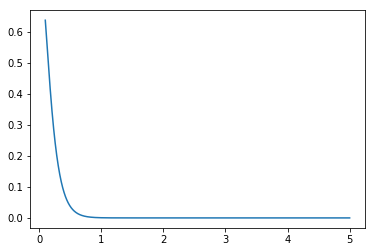

In [21]:
x = np.linspace(0.1, 5, 2000)
y = kappa_int(x, 0.0, 0.21)
plt.plot(x, y)
plt.show()

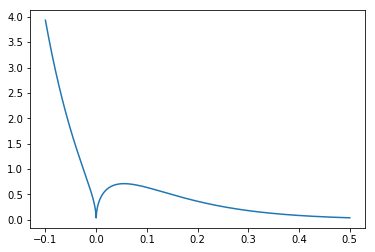

In [22]:
# Evaluamos como se ve cuando pasa por x=0

x = np.linspace(-0.1, 0.5, 2000)
y = kappa_int(x, 0.0, 0.21)
plt.plot(x, y)
plt.show()

In [23]:
# Integramos la funcion desde -50 hasta 0.1

sts = time.time()
erer = RK4(kappa_int, -50, 0.1, 10000, 1e216, 0.21)
print("Tiempo que se demoró integrando: %.4f segundos"%(time.time()-sts))
print("Resultado de la integración: ", erer)

Diferencia f(x+dx) - f(x):  -0.01211221978565602
Tiempo que se demoró integrando: 0.5149 segundos
Resultado de la integración:  2.24000959453759e+214


**Ahora:** Podemos calcular finalmente las curvas de nivel. La función `kappa_level()` se define como:
$$\kappa = \frac{1}{\eta\beta\rho\sigma}\left\{ \eta\pi\sigma^2-\mu-\int_{-\infty}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz \right\} \ \in [0, 1/c)$$

In [24]:
def kappa_level(zz, y, param_dict):
    # Definimos el termino de la integral
    pi_it = np.linspace(0.0, 1.0, 1000)
    
    coef = 1/(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    kapp = []
    
    for i in range(1000):
        '''RK4(kappa_int, lim_inf, lim_sup, 1000, 1e129, pi_it[i]) +''' 
        RKint = RK4(kappa_int, Lim_inf, Lim_sup, 1000, 1e129, pi_it[i])
        corch = param_dict["eta"]*pi_it[i]*param_dict["sig"]*param_dict["sig"] - param_dict["mu"] - RKint
        kapp.append(coef*corch)
    
    kapp = np.array(kapp)
    return pi_it, kapp

In [25]:
# Limites de la integral para x<0
lim_inf = -5.0
lim_sup = -0.01
# Limites de la integral para x>0
Lim_inf = 0.01
Lim_sup = 5.0

x = np.linspace(-2.0, 2.0, 1000)
ppp, kkk = kappa_level(x, 0, all_params)

Diferencia f(x+dx) - f(x):  -8.247417556476979e-20
Diferencia f(x+dx) - f(x):  -7.762427822943639e-20
Diferencia f(x+dx) - f(x):  -7.35311898029996e-20
Diferencia f(x+dx) - f(x):  -7.001870686581284e-20
Diferencia f(x+dx) - f(x):  -6.696252866018906e-20
Diferencia f(x+dx) - f(x):  -6.427236072267218e-20
Diferencia f(x+dx) - f(x):  -6.188092541107891e-20
Diferencia f(x+dx) - f(x):  -5.973698152794522e-20
Diferencia f(x+dx) - f(x):  -5.780074959861483e-20
Diferencia f(x+dx) - f(x):  -5.60408281656133e-20
Diferencia f(x+dx) - f(x):  -5.443206228323381e-20
Diferencia f(x+dx) - f(x):  -5.295403683982868e-20
Diferencia f(x+dx) - f(x):  -5.158999003934267e-20
Diferencia f(x+dx) - f(x):  -5.032601570589346e-20
Diferencia f(x+dx) - f(x):  -4.91504681122895e-20
Diferencia f(x+dx) - f(x):  -4.805351139362565e-20
Diferencia f(x+dx) - f(x):  -4.702677387918674e-20
Diferencia f(x+dx) - f(x):  -4.606307969720367e-20
Diferencia f(x+dx) - f(x):  -4.5156238068820216e-20
Diferencia f(x+dx) - f(x):  -4.43

Diferencia f(x+dx) - f(x):  -1.7553188322513824e-20
Diferencia f(x+dx) - f(x):  -1.7501672048797344e-20
Diferencia f(x+dx) - f(x):  -1.7450606699490868e-20
Diferencia f(x+dx) - f(x):  -1.7399985734616342e-20
Diferencia f(x+dx) - f(x):  -1.73498027462211e-20
Diferencia f(x+dx) - f(x):  -1.7300051454970172e-20
Diferencia f(x+dx) - f(x):  -1.7250725706846485e-20
Diferencia f(x+dx) - f(x):  -1.7201819469953348e-20
Diferencia f(x+dx) - f(x):  -1.715332683141644e-20
Diferencia f(x+dx) - f(x):  -1.710524199438139e-20
Diferencia f(x+dx) - f(x):  -1.7057559275102775e-20
Diferencia f(x+dx) - f(x):  -1.7010273100122926e-20
Diferencia f(x+dx) - f(x):  -1.6963378003534985e-20
Diferencia f(x+dx) - f(x):  -1.6916868624329894e-20
Diferencia f(x+dx) - f(x):  -1.6870739703821806e-20
Diferencia f(x+dx) - f(x):  -1.6824986083151167e-20
Diferencia f(x+dx) - f(x):  -1.677960270086055e-20
Diferencia f(x+dx) - f(x):  -1.673458459054401e-20
Diferencia f(x+dx) - f(x):  -1.668992687856408e-20
Diferencia f(x+dx) 

Diferencia f(x+dx) - f(x):  -1.2534785678293656e-20
Diferencia f(x+dx) - f(x):  -1.2515985170989882e-20
Diferencia f(x+dx) - f(x):  -1.2497269005010849e-20
Diferencia f(x+dx) - f(x):  -1.2478636551631671e-20
Diferencia f(x+dx) - f(x):  -1.2460087188668884e-20
Diferencia f(x+dx) - f(x):  -1.2441620300394404e-20
Diferencia f(x+dx) - f(x):  -1.242323527744881e-20
Diferencia f(x+dx) - f(x):  -1.2404931516757184e-20
Diferencia f(x+dx) - f(x):  -1.2386708421446008e-20
Diferencia f(x+dx) - f(x):  -1.2368565400761452e-20
Diferencia f(x+dx) - f(x):  -1.235050186998902e-20
Diferencia f(x+dx) - f(x):  -1.2332517250374194e-20
Diferencia f(x+dx) - f(x):  -1.2314610969044493e-20
Diferencia f(x+dx) - f(x):  -1.2296782458933484e-20
Diferencia f(x+dx) - f(x):  -1.2279031158704184e-20
Diferencia f(x+dx) - f(x):  -1.2261356512676165e-20
Diferencia f(x+dx) - f(x):  -1.22437579707514e-20
Diferencia f(x+dx) - f(x):  -1.2226234988343009e-20
Diferencia f(x+dx) - f(x):  -1.2208787026304093e-20
Diferencia f(x+d

Diferencia f(x+dx) - f(x):  -1.027906694966134e-20
Diferencia f(x+dx) - f(x):  -1.0268691643767967e-20
Diferencia f(x+dx) - f(x):  -1.0258347691843788e-20
Diferencia f(x+dx) - f(x):  -1.0248034936288463e-20
Diferencia f(x+dx) - f(x):  -1.0237753220608052e-20
Diferencia f(x+dx) - f(x):  -1.022750238940567e-20
Diferencia f(x+dx) - f(x):  -1.0217282288371476e-20
Diferencia f(x+dx) - f(x):  -1.020709276427266e-20
Diferencia f(x+dx) - f(x):  -1.0196933664944239e-20
Diferencia f(x+dx) - f(x):  -1.0186804839278955e-20
Diferencia f(x+dx) - f(x):  -1.0176706137218506e-20
Diferencia f(x+dx) - f(x):  -1.0166637409743484e-20
Diferencia f(x+dx) - f(x):  -1.0156598508864758e-20
Diferencia f(x+dx) - f(x):  -1.0146589287614085e-20
Diferencia f(x+dx) - f(x):  -1.0136609600034864e-20
Diferencia f(x+dx) - f(x):  -1.0126659301173422e-20
Diferencia f(x+dx) - f(x):  -1.011673824707054e-20
Diferencia f(x+dx) - f(x):  -1.010684629475187e-20
Diferencia f(x+dx) - f(x):  -1.0096983302219804e-20
Diferencia f(x+dx

Diferencia f(x+dx) - f(x):  -8.89432082795536e-21
Diferencia f(x+dx) - f(x):  -8.88759657924542e-21
Diferencia f(x+dx) - f(x):  -8.880887558409032e-21
Diferencia f(x+dx) - f(x):  -8.874193708057333e-21
Diferencia f(x+dx) - f(x):  -8.867514971103716e-21
Diferencia f(x+dx) - f(x):  -8.860851290761941e-21
Diferencia f(x+dx) - f(x):  -8.854202610544076e-21
Diferencia f(x+dx) - f(x):  -8.847568874258297e-21
Diferencia f(x+dx) - f(x):  -8.840950026007207e-21
Diferencia f(x+dx) - f(x):  -8.834346010185575e-21
Diferencia f(x+dx) - f(x):  -8.827756771478453e-21
Diferencia f(x+dx) - f(x):  -8.821182254859375e-21
Diferencia f(x+dx) - f(x):  -8.81462240558826e-21
Diferencia f(x+dx) - f(x):  -8.808077169209606e-21
Diferencia f(x+dx) - f(x):  -8.801546491550472e-21
Diferencia f(x+dx) - f(x):  -8.795030318718667e-21
Diferencia f(x+dx) - f(x):  -8.788528597100852e-21
Diferencia f(x+dx) - f(x):  -8.782041273360852e-21
Diferencia f(x+dx) - f(x):  -8.775568294437516e-21
Diferencia f(x+dx) - f(x):  -8.769

Diferencia f(x+dx) - f(x):  -7.946439956200237e-21
Diferencia f(x+dx) - f(x):  -7.941643474978577e-21
Diferencia f(x+dx) - f(x):  -7.936855668763609e-21
Diferencia f(x+dx) - f(x):  -7.932076511437245e-21
Diferencia f(x+dx) - f(x):  -7.927305976991268e-21
Diferencia f(x+dx) - f(x):  -7.922544039526881e-21
Diferencia f(x+dx) - f(x):  -7.9177906732541e-21
Diferencia f(x+dx) - f(x):  -7.913045852491035e-21
Diferencia f(x+dx) - f(x):  -7.908309551663454e-21
Diferencia f(x+dx) - f(x):  -7.903581745304064e-21
Diferencia f(x+dx) - f(x):  -7.898862408052194e-21
Diferencia f(x+dx) - f(x):  -7.894151514652909e-21
Diferencia f(x+dx) - f(x):  -7.889449039956597e-21
Diferencia f(x+dx) - f(x):  -7.884754958918393e-21
Diferencia f(x+dx) - f(x):  -7.880069246597672e-21
Diferencia f(x+dx) - f(x):  -7.875391878157426e-21
Diferencia f(x+dx) - f(x):  -7.87072282886361e-21
Diferencia f(x+dx) - f(x):  -7.86606207408488e-21
Diferencia f(x+dx) - f(x):  -7.861409589291678e-21
Diferencia f(x+dx) - f(x):  -7.8567

Diferencia f(x+dx) - f(x):  -7.252329967518323e-21
Diferencia f(x+dx) - f(x):  -7.248683239522046e-21
Diferencia f(x+dx) - f(x):  -7.245042007107233e-21
Diferencia f(x+dx) - f(x):  -7.241406256484829e-21
Diferencia f(x+dx) - f(x):  -7.237775973914142e-21
Diferencia f(x+dx) - f(x):  -7.234151145702459e-21
Diferencia f(x+dx) - f(x):  -7.230531758205313e-21
Diferencia f(x+dx) - f(x):  -7.226917797825856e-21
Diferencia f(x+dx) - f(x):  -7.22330925101476e-21
Diferencia f(x+dx) - f(x):  -7.219706104269886e-21
Diferencia f(x+dx) - f(x):  -7.216108344136446e-21
Diferencia f(x+dx) - f(x):  -7.212515957206283e-21
Diferencia f(x+dx) - f(x):  -7.208928930118115e-21
Diferencia f(x+dx) - f(x):  -7.205347249557049e-21


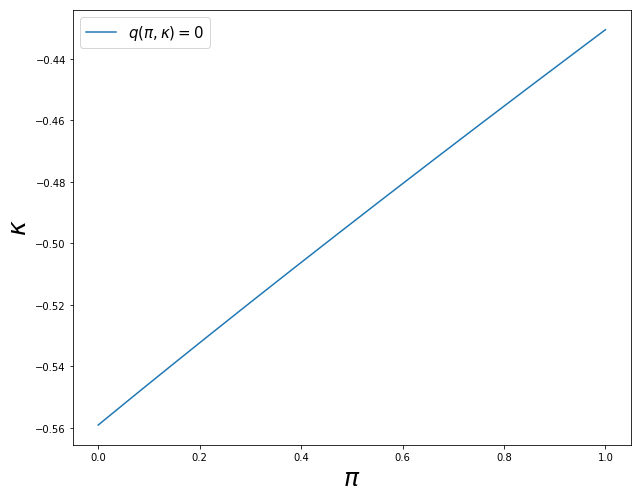

In [26]:
plt.figure(figsize=(10, 8))
plt.plot(ppp, kkk, label=r"$q(\pi, \kappa)=0$")
plt.xlabel(r"$\pi$", fontsize=25)
plt.ylabel(r"$\kappa$", fontsize=25)
plt.legend(loc="best", fontsize=15)
#plt.savefig("q0.pdf", bbox_inches="tight")
plt.show()

## Segunda curva de nivel:
---
Repetimos el procedimiento, ahora para la función:

$$\pi = \frac{\lambda}{\eta\beta\rho\sigma}\left\{ \int_0^c\frac{y\ f(y)}{\left[ 1-\kappa y \right]^{\eta}}dy +\frac{c[1-F(y)]}{\left[ 1-\kappa c \right]^{\eta}}\right\} + \frac{\beta\kappa}{\rho\sigma}-\frac{p}{\eta\beta\rho\sigma} \ \in (-\infty, +\infty)$$

Nuevamente, primero definimos la función dentro del término integral `pi_level_integ()`

In [27]:
def pi_level_integ(xx, y, kapp_par):#, param_dict):
    num = xx*dens_func(xx, y, all_params)#, param_dict)
    den = np.float_power(1-(kapp_par*xx), all_params["eta"])
    return num/den

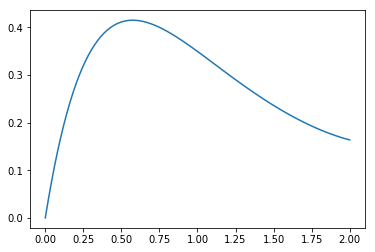

In [28]:
# Visualizacion funcion

x = np.linspace(0, 2, 100)
y = pi_level_integ(x, 0, 0.4)
plt.plot(x, y)
plt.show()

Ahora, calculamos la curva de nivel definiendo `pi_level()` como 

$$\pi = \frac{\lambda}{\eta\beta\rho\sigma}\left\{ \int_0^c\frac{y\ f(y)}{\left[ 1-\kappa y \right]^{\eta}}dy +\frac{c[1-F(y)]}{\left[ 1-\kappa c \right]^{\eta}}\right\} + \frac{\beta\kappa}{\rho\sigma}-\frac{p}{\eta\beta\rho\sigma} \ \in (-\infty, +\infty)$$

iterando valores de kappa según la restricción $\kappa \in [0, 1/c)$

In [29]:
def pi_level(param_dict):
    
    k_it  = np.linspace(0.0, 1./param_dict["c"], 1000)
    pi_it = []
    
    coef = param_dict["lamb"]/(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    num2 = param_dict["c"]*(1.-dist_func(param_dict["c"], y, param_dict))
    ter4 = param_dict["p"]/(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    for i in range(1000):
        #cor1 = NEW_RK4(pi_level_integ, 0, 1./param_dict["c"], 1000, k_it[i], 1.0, param_dict)
        cor1 = RK4(pi_level_integ, 0, 1./param_dict["c"], 1000, 5.0, k_it[i])
        cor2 = num2/(np.float_power(1-(k_it[i]*param_dict["c"]), param_dict["eta"]))
        ter3 = (param_dict["beta"]*k_it[i])/(param_dict["rho"]*param_dict["sig"])
        
        sol = coef*(cor1+cor2)+ter3-ter4
        pi_it.append(sol)
    
    pi_it = np.array(pi_it)
        
    return k_it, pi_it

In [30]:
kl, pil = pi_level(all_params)

Diferencia f(x+dx) - f(x):  0.00011454947821643024
Diferencia f(x+dx) - f(x):  0.00011457486753563284
Diferencia f(x+dx) - f(x):  0.00011460026425591519
Diferencia f(x+dx) - f(x):  0.00011462566838005284
Diferencia f(x+dx) - f(x):  0.0001146510799110434
Diferencia f(x+dx) - f(x):  0.00011467649885182896
Diferencia f(x+dx) - f(x):  0.00011470192520540712
Diferencia f(x+dx) - f(x):  0.00011472735897466446
Diferencia f(x+dx) - f(x):  0.0001147528001626541
Diferencia f(x+dx) - f(x):  0.00011477824877204057
Diferencia f(x+dx) - f(x):  0.000114803704805988
Diferencia f(x+dx) - f(x):  0.0001148291682674385
Diferencia f(x+dx) - f(x):  0.00011485463915938965
Diferencia f(x+dx) - f(x):  0.000114880117484506
Diferencia f(x+dx) - f(x):  0.00011490560324617372
Diferencia f(x+dx) - f(x):  0.00011493109644700183
Diferencia f(x+dx) - f(x):  0.00011495659709004347
Diferencia f(x+dx) - f(x):  0.00011498210517829621
Diferencia f(x+dx) - f(x):  0.00011500762071470216
Diferencia f(x+dx) - f(x):  0.00011503

Diferencia f(x+dx) - f(x):  0.00011950971722790582
Diferencia f(x+dx) - f(x):  0.00011953656717278438
Diferencia f(x+dx) - f(x):  0.00011956342510427431
Diferencia f(x+dx) - f(x):  0.00011959029102559526
Diferencia f(x+dx) - f(x):  0.00011961716493996688
Diferencia f(x+dx) - f(x):  0.00011964404685049779
Diferencia f(x+dx) - f(x):  0.00011967093676062968
Diferencia f(x+dx) - f(x):  0.00011969783467341566
Diferencia f(x+dx) - f(x):  0.00011972474059235294
Diferencia f(x+dx) - f(x):  0.00011975165452043912
Diferencia f(x+dx) - f(x):  0.00011977857646106038
Diferencia f(x+dx) - f(x):  0.00011980550641743637
Diferencia f(x+dx) - f(x):  0.00011983244439284224
Diferencia f(x+dx) - f(x):  0.00011985939039044213
Diferencia f(x+dx) - f(x):  0.0001198863444135112
Diferencia f(x+dx) - f(x):  0.00011991330646538012
Diferencia f(x+dx) - f(x):  0.00011994027654926853
Diferencia f(x+dx) - f(x):  0.00011996725466839608
Diferencia f(x+dx) - f(x):  0.00011999424082609345
Diferencia f(x+dx) - f(x):  0.00

Diferencia f(x+dx) - f(x):  0.0001241633478210047
Diferencia f(x+dx) - f(x):  0.00012419159477916608
Diferencia f(x+dx) - f(x):  0.0001242198502951486
Diferencia f(x+dx) - f(x):  0.00012424811437256045
Diferencia f(x+dx) - f(x):  0.00012427638701495436
Diferencia f(x+dx) - f(x):  0.00012430466822588304
Diferencia f(x+dx) - f(x):  0.00012433295800878819
Diferencia f(x+dx) - f(x):  0.00012436125636727802
Diferencia f(x+dx) - f(x):  0.00012438956330496076
Diferencia f(x+dx) - f(x):  0.0001244178788252781
Diferencia f(x+dx) - f(x):  0.00012444620293178277
Diferencia f(x+dx) - f(x):  0.00012447453562808297
Diferencia f(x+dx) - f(x):  0.00012450287691767592
Diferencia f(x+dx) - f(x):  0.00012453122680411433
Diferencia f(x+dx) - f(x):  0.00012455958529100641
Diferencia f(x+dx) - f(x):  0.0001245879523819049
Diferencia f(x+dx) - f(x):  0.00012461632808030698
Diferencia f(x+dx) - f(x):  0.00012464471238976538
Diferencia f(x+dx) - f(x):  0.0001246731053138883
Diferencia f(x+dx) - f(x):  0.000124

Diferencia f(x+dx) - f(x):  0.0001338775560799088
Diferencia f(x+dx) - f(x):  0.0001339088011121925
Diferencia f(x+dx) - f(x):  0.00013394005596406577
Diferencia f(x+dx) - f(x):  0.00013397132063996953
Diferencia f(x+dx) - f(x):  0.00013400259514378954
Diferencia f(x+dx) - f(x):  0.00013403387948007772
Diferencia f(x+dx) - f(x):  0.00013406517365277537
Diferencia f(x+dx) - f(x):  0.00013409647766621235
Diferencia f(x+dx) - f(x):  0.00013412779152466303
Diferencia f(x+dx) - f(x):  0.00013415911523223523
Diferencia f(x+dx) - f(x):  0.0001341904487932033
Diferencia f(x+dx) - f(x):  0.0001342217922118416
Diferencia f(x+dx) - f(x):  0.00013425314549231349
Diferencia f(x+dx) - f(x):  0.00013428450863905983
Diferencia f(x+dx) - f(x):  0.0001343158816559109
Diferencia f(x+dx) - f(x):  0.00013434726454747414
Diferencia f(x+dx) - f(x):  0.00013437865731785736
Diferencia f(x+dx) - f(x):  0.0001344100599712239
Diferencia f(x+dx) - f(x):  0.00013444147251195915
Diferencia f(x+dx) - f(x):  0.0001344

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


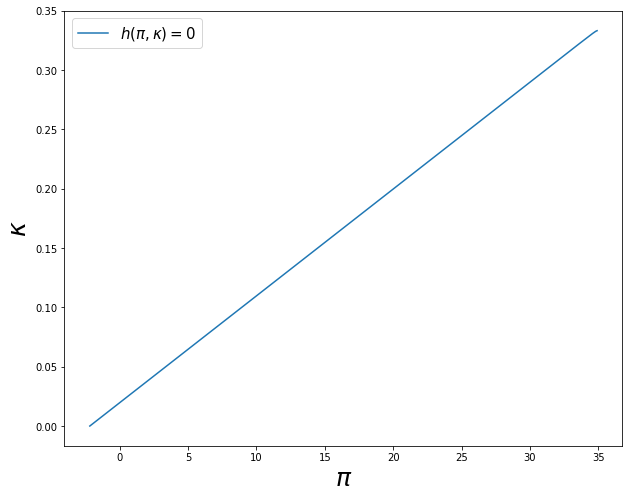

In [31]:
plt.figure(figsize=(10,8))
plt.plot(pil, kl, label=r"$h(\pi, \kappa)=0$")
plt.xlabel(r"$\pi$", fontsize=25)
plt.ylabel(r"$\kappa$", fontsize=25)
plt.legend(loc="best", fontsize=15)
#plt.savefig("h0.pdf", bbox_inches="tight")
plt.show()